In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from iFEMG_feature import df_save_csv, z_score_norm, fea_df_norm

In [3]:
"""读取超声数据存进df"""
excel_file_path = r"E:\Data\20230424-单人双次iFEMG肌力等级测试\US_data-n.xlsx"

# 初始化两个df分别用于存储弯举和伸展的所有超声数据
bicps_curl_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])
tricps_stretch_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])

# 获取excel中的所有sheet name
excel_file = pd.ExcelFile(excel_file_path)
sheet_names = excel_file.sheet_names

# 遍历所有sheet读取数据并存入两个df
for name in sheet_names:
    sheet_df = pd.read_excel(excel_file_path, name, header=[0,1,2])
    # 遍历4行数据（0kg, 0.5kg ,1kg ,2kg)
    for i in range(4):
        bicps_curl_df = pd.concat([bicps_curl_df, pd.DataFrame({"subject":              [name],
                                                                "weight":               [sheet_df["weight"].values[i][0]],
                                                                "bicps_br_R":           [sheet_df['bicps_br']['bicps_br']['R'].values[i]],
                                                                "bicps_br_thickness":   [sheet_df['bicps_br']['bicps_br']['thickness'].values[i]],
                                                                "tricps_med_R":         [sheet_df['bicps_br']['tricps_m']['R'].values[i]],
                                                                "tricps_med_thickness": [sheet_df['bicps_br']['tricps_m']['thickness'].values[i]],
                                                                "tricps_lat_R":         [sheet_df['bicps_br']['tricps_l']['R'].values[i]],
                                                                "tricps_lat_thickness": [sheet_df['bicps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        tricps_stretch_df = pd.concat([tricps_stretch_df, pd.DataFrame({"subject":              [name],
                                                                        "weight":               [sheet_df["weight"].values[i][0]],
                                                                        "bicps_br_R":           [sheet_df['tricps_br']['bicps_br']['R'].values[i]],
                                                                        "bicps_br_thickness":   [sheet_df['tricps_br']['bicps_br']['thickness'].values[i]],
                                                                        "tricps_med_R":         [sheet_df['tricps_br']['tricps_m']['R'].values[i]],
                                                                        "tricps_med_thickness": [sheet_df['tricps_br']['tricps_m']['thickness'].values[i]],
                                                                        "tricps_lat_R":         [sheet_df['tricps_br']['tricps_l']['R'].values[i]],
                                                                        "tricps_lat_thickness": [sheet_df['tricps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        pass
    
    pass

In [4]:

bicps_curl_df

,subject,weight,bicps_br_R,bicps_br_thickness,tricps_med_R,tricps_med_thickness,tricps_lat_R,tricps_lat_thickness
0,lpy-1,0.0,10.976900,39.576700,12.876400,30.545000,11.035200,26.798300
1,lpy-1,0.5,10.659400,40.681700,11.715200,30.030000,11.602100,26.570000
2,lpy-1,1.0,10.584600,41.383300,10.969100,29.588300,11.382400,27.285000
3,lpy-1,2.0,10.134200,41.625000,12.254900,29.408300,11.035200,28.161700
4,lpy-2,0.0,12.273700,39.788300,12.060000,29.895000,12.236400,27.190000
...,...,...,...,...,...,...,...,...
75,zpk-1,2.0,10.370190,44.875000,11.390971,34.198333,11.173588,33.165000
76,zpk-2,0.0,11.512970,42.358333,11.714645,32.408333,12.898881,33.963333
77,zpk-2,0.5,10.949590,44.761667,11.265779,34.823333,11.207850,33.786667
78,zpk-2,1.0,10.738176,44.178333,10.346417,32.998333,12.675969,36.238333


In [5]:
df_save_csv(bicps_curl_df, r"E:\Data\20230424-单人双次iFEMG肌力等级测试\bicps_curl_US.csv")

Done!


In [6]:

bicps_curl_df["tricps_lat_thickness"].values

array([26.7983    , 26.57      , 27.285     , 28.1617    , 27.19      ,
       26.2217    , 26.48      , 27.7417    , 30.1667    , 30.5717    ,
       31.2333    , 30.9017    , 30.4067    , 30.6183    , 30.495     ,
       31.8383    , 25.995     , 26.06833333, 26.51833333, 27.42166667,
       29.8783    , 27.595     , 26.975     , 28.2533    , 26.30333333,
       25.36333333, 27.4       , 28.35333333, 25.21      , 27.27833333,
       26.88666667, 30.83      , 27.80166667, 26.49      , 27.41      ,
       28.06666667, 28.15666667, 28.09666667, 26.73333333, 28.87      ,
       24.97333333, 23.32333333, 23.31333333, 25.78333333, 21.00666667,
       22.665     , 24.33666667, 24.35833333, 27.11      , 28.11166667,
       27.15833333, 27.08166667, 26.76      , 28.11      , 27.07666667,
       26.92833333, 28.57666667, 27.985     , 26.91166667, 31.14666667,
       30.485     , 30.07166667, 30.52666667, 34.05      , 24.54      ,
       24.78166667, 24.59      , 25.97833333, 23.64      , 23.16

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 0.5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.390e-02 U_stat=2.840e+02
0.5 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.075e-01 U_stat=2.600e+02
0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:8.357e-04 U_stat=3.240e+02


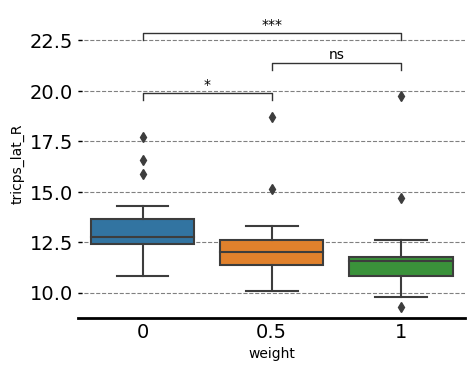

In [7]:
"""结果可视化"""
df2show = tricps_stretch_df
x = "weight"
y = "tricps_lat_R"
order = [0, 0.5, 1]
fig,ax = plt.subplots(figsize=(5,4),dpi=100,facecolor="w")
ax = sns.boxplot(data=df2show, x=x, y=y, order=order,ax=ax)
 
#pairs=[(0, 0.5), (0, 1), (0, 2), (0.5, 1), (0.5, 2), (1, 2)]
pairs=[(0, 0.5), (0, 1), (0.5, 1)]
annotator = Annotator(ax, pairs, data=df2show, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()
 
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.grid(axis='y',ls='--',c='gray')
ax.set_axisbelow(True)
plt.show()

- 以上为读取超声原始数据并基于python进行非参数显著性差异分析的代码
- 以下读取超声原始数据，归一化并保存

In [8]:
"""读取超声数据
归一化
存进df"""
excel_file_path = r"E:\Data\20230424-单人双次iFEMG肌力等级测试\US_data-n.xlsx"

# 初始化两个df分别用于存储弯举和伸展的所有超声数据
bicps_curl_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])
tricps_stretch_df = pd.DataFrame(columns=["subject", "weight", "bicps_br_R", "bicps_br_thickness", "tricps_med_R", "tricps_med_thickness", "tricps_lat_R", "tricps_lat_thickness"])

# 获取excel中的所有sheet name
excel_file = pd.ExcelFile(excel_file_path)
sheet_names = excel_file.sheet_names

# 遍历所有sheet读取数据并存入两个df
for name in sheet_names:
    sheet_df = pd.read_excel(excel_file_path, name, header=[0,1,2])
    # 对每个sheet_df进行归一化
    sheet_df_norm = fea_df_norm(sheet_df, )
    # 遍历4行数据（0kg, 0.5kg ,1kg ,2kg)
    for i in range(4):
        bicps_curl_df = pd.concat([bicps_curl_df, pd.DataFrame({"subject":              [name],
                                                                "weight":               [sheet_df["weight"].values[i][0]],
                                                                "bicps_br_R":           [sheet_df['bicps_br']['bicps_br']['R'].values[i]],
                                                                "bicps_br_thickness":   [sheet_df['bicps_br']['bicps_br']['thickness'].values[i]],
                                                                "tricps_med_R":         [sheet_df['bicps_br']['tricps_m']['R'].values[i]],
                                                                "tricps_med_thickness": [sheet_df['bicps_br']['tricps_m']['thickness'].values[i]],
                                                                "tricps_lat_R":         [sheet_df['bicps_br']['tricps_l']['R'].values[i]],
                                                                "tricps_lat_thickness": [sheet_df['bicps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        tricps_stretch_df = pd.concat([tricps_stretch_df, pd.DataFrame({"subject":              [name],
                                                                        "weight":               [sheet_df["weight"].values[i][0]],
                                                                        "bicps_br_R":           [sheet_df['tricps_br']['bicps_br']['R'].values[i]],
                                                                        "bicps_br_thickness":   [sheet_df['tricps_br']['bicps_br']['thickness'].values[i]],
                                                                        "tricps_med_R":         [sheet_df['tricps_br']['tricps_m']['R'].values[i]],
                                                                        "tricps_med_thickness": [sheet_df['tricps_br']['tricps_m']['thickness'].values[i]],
                                                                        "tricps_lat_R":         [sheet_df['tricps_br']['tricps_l']['R'].values[i]],
                                                                        "tricps_lat_thickness": [sheet_df['tricps_br']['tricps_l']['thickness'].values[i]]})], axis=0, ignore_index=True)
        pass
    
    pass

In [9]:
sheet_df

weight   bicps_br                                              \
  Unnamed: 0_level_1   bicps_br              tricps_m              tricps_l   
  Unnamed: 0_level_2          R  thickness          R  thickness          R   
0                0.0  11.512970  42.358333  11.714645  32.408333  12.898881   
1                0.5  10.949590  44.761667  11.265779  34.823333  11.207850   
2                1.0  10.738176  44.178333  10.346417  32.998333  12.675969   
3                2.0  10.636396  46.395000  12.078035  34.388333  11.619083   

              tricps_br                                                         
               bicps_br              tricps_m              tricps_l             
   thickness          R  thickness          R  thickness          R  thickness  
0  33.963333  11.906903  32.136667  13.051059  37.136667  11.042418  23.963333  
1  33.786667  12.124050  33.715000  11.134620  39.353333  10.055385  23.770000  
2  36.238333  11.240047  34.440000  10.745961  41.055000   9.755576  24.671667  
3  36.641667        NaN        NaN        NaN        NaN        NaN        NaN

In [10]:
fea_df_norm(sheet_df, col_name = [( 'bicps_br',           'bicps_br',                  'R'),
            ( 'bicps_br',           'bicps_br',          'thickness'),
            ( 'bicps_br',           'tricps_m',                  'R'),
            ( 'bicps_br',           'tricps_m',          'thickness'),
            ( 'bicps_br',           'tricps_l',                  'R'),
            ( 'bicps_br',           'tricps_l',          'thickness'),
            ('tricps_br',           'bicps_br',                  'R'),
            ('tricps_br',           'bicps_br',          'thickness'),
            ('tricps_br',           'tricps_m',                  'R'),
            ('tricps_br',           'tricps_m',          'thickness'),
            ('tricps_br',           'tricps_l',                  'R'),
            ('tricps_br',           'tricps_l',          'thickness')])

e:\code\iFEMG-processing\iFEMG_feature.py:884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[name] = (df_temp[name] - min_value)/(max_value - min_value)


weight  bicps_br                                          \
  Unnamed: 0_level_1  bicps_br            tricps_m            tricps_l   
  Unnamed: 0_level_2         R thickness         R thickness         R   
0                0.0  1.000000  0.000000  0.790144  0.000000  1.000000   
1                0.5  0.357293  0.595376  0.530926  1.000000  0.000000   
2                1.0  0.116111  0.450867  0.000000  0.244306  0.868180   
3                2.0  0.000000  1.000000  1.000000  0.819876  0.243185   

            tricps_br                                                   
             bicps_br            tricps_m           tricps_l            
  thickness         R thickness         R thickness        R thickness  
0  0.061880   0.75436  0.000000  1.000000  0.000000  1.00000  0.214418  
1  0.000000   1.00000  0.685239  0.168609  0.565717  0.23298  0.000000  
2  0.858727   0.00000  1.000000  0.000000  1.000000  0.00000  1.000000  
3  1.000000       NaN       NaN       NaN       NaN      NaN       NaN

In [11]:
sheet_df

weight   bicps_br                                              \
  Unnamed: 0_level_1   bicps_br              tricps_m              tricps_l   
  Unnamed: 0_level_2          R  thickness          R  thickness          R   
0                0.0  11.512970  42.358333  11.714645  32.408333  12.898881   
1                0.5  10.949590  44.761667  11.265779  34.823333  11.207850   
2                1.0  10.738176  44.178333  10.346417  32.998333  12.675969   
3                2.0  10.636396  46.395000  12.078035  34.388333  11.619083   

              tricps_br                                                         
               bicps_br              tricps_m              tricps_l             
   thickness          R  thickness          R  thickness          R  thickness  
0  33.963333  11.906903  32.136667  13.051059  37.136667  11.042418  23.963333  
1  33.786667  12.124050  33.715000  11.134620  39.353333  10.055385  23.770000  
2  36.238333  11.240047  34.440000  10.745961  41.055000   9.755576  24.671667  
3  36.641667        NaN        NaN        NaN        NaN        NaN        NaN

In [12]:
sheet_df[list(sheet_df)[1]]

0    11.512970
1    10.949590
2    10.738176
3    10.636396
Name: (bicps_br, bicps_br, R), dtype: float64